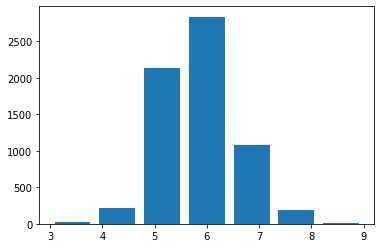

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
red['type'] = 0
white['type'] = 1
wine = pd.concat([red, white])
#이항 분류에서는 성질들을 이용해 빨간색/흰색만을 구분했다면 이번에는 품질들로 분류를 해보기로 한다.

plt.hist(wine['quality'], bins = 7, rwidth = 0.8)
plt.show()

In [3]:
#3~5, 6, 7~9까지 나쁨, 보통, 좋음의 세개의 분류 기준으로 나누어서 정리를 해보고자 한다.
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2
#pandas의 dataframe은 loc를 이용해 특정 데이터의 index를 골라내는 역할을 해준다.
#각 항목을 구성하는 요소의 수가 비슷해야 학습 데이터에 유용하다.


In [4]:
#새로운 속성인 new_quality로 분류를 했기 때문에 예측하고 싶은 값인 quality의 정답이 있어서는 안된다.
del wine['quality']
wine_norm = (wine-wine.min()) / (wine.max()-wine.min())
wine_shuffle = wine_norm.sample(frac = 1)
wine_np = wine_shuffle.to_numpy()                                               

train_idx = int(len(wine_np)*0.8)
x_train, y_train = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
x_test, y_test = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 3)


In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(48, activation = 'relu', input_shape = (12,)))
model.add(tf.keras.layers.Dense(24, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(12, activation = 'relu'))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

early_stopping_callbck = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 100)
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.25, callbacks=[early_stopping_callbck])

Epoch 1/100
122/122 [==============================] - 1s 8ms/step - loss: 0.6864 - accuracy: 0.7280 - val_loss: 0.7240 - val_accuracy: 0.7900
Epoch 2/100
122/122 [==============================] - 1s 7ms/step - loss: 0.4382 - accuracy: 0.8173 - val_loss: 0.5494 - val_accuracy: 0.7908
Epoch 3/100
122/122 [==============================] - 1s 6ms/step - loss: 0.4097 - accuracy: 0.8132 - val_loss: 0.4516 - val_accuracy: 0.8038
Epoch 4/100
122/122 [==============================] - 1s 6ms/step - loss: 0.3924 - accuracy: 0.8150 - val_loss: 0.4068 - val_accuracy: 0.8200
Epoch 5/100
122/122 [==============================] - 1s 6ms/step - loss: 0.3812 - accuracy: 0.8211 - val_loss: 0.3866 - val_accuracy: 0.8208
Epoch 6/100
122/122 [==============================] - 1s 6ms/step - loss: 0.3751 - accuracy: 0.8250 - val_loss: 0.3748 - val_accuracy: 0.8269
Epoch 7/100
122/122 [==============================] - 1s 6ms/step - loss: 0.3740 - accuracy: 0.8222 - val_loss: 0.4096 - val_accuracy: 0.8015

In [28]:
model1 = tf.keras.Sequential([
                              tf.keras.layers.Dense(48, activation = 'relu', input_shape = (12,)),
                              tf.keras.layers.Dense(24, activation = 'softplus'),
                              tf.keras.layers.Dense(12, activation = 'softplus'),
                              tf.keras.layers.Dense(3, activation = 'softmax')
])

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 100)
history1 = model1.fit(x_train, y_train, epochs = 100, batch_size = 32, callbacks = [early_stopping_callbacks])

Epoch 1/100
163/163 [==============================] - 1s 3ms/step - loss: 0.5415 - accuracy: 0.8012
Epoch 2/100
163/163 [==============================] - 1s 4ms/step - loss: 0.4599 - accuracy: 0.8012
Epoch 3/100
163/163 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.8099
Epoch 4/100
163/163 [==============================] - 1s 4ms/step - loss: 0.4110 - accuracy: 0.8134
Epoch 5/100
163/163 [==============================] - 1s 3ms/step - loss: 0.4029 - accuracy: 0.8141
Epoch 6/100
163/163 [==============================] - 1s 4ms/step - loss: 0.4022 - accuracy: 0.8145
Epoch 7/100
163/163 [==============================] - 1s 4ms/step - loss: 0.3981 - accuracy: 0.8162
Epoch 8/100
163/163 [==============================] - 1s 3ms/step - loss: 0.3972 - accuracy: 0.8124
Epoch 9/100
163/163 [==============================] - 1s 4ms/step - loss: 0.3966 - accuracy: 0.8168
Epoch 10/100
163/163 [==============================] - 1s 3ms/step - loss: 0.3941 - accura

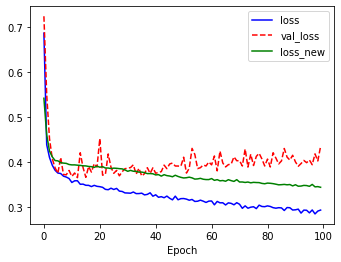

In [31]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.plot(history1.history['loss'], 'g-', label = 'loss_new')
plt.xlabel('Epoch')
plt.legend()
plt.show()

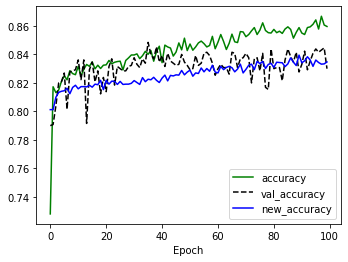

In [33]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.plot(history1.history['accuracy'], 'b-', label = 'new_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [35]:
#시각화 결과 모델 중간의 레이어에 포함시킨 batch normalization 때문인지 학습이 잘 된 것 같다. 
#그래서인지 epoch 100번 중에 earlystoppingcallback이 한번도 적용되지 않고 끝까지 진행이 되었다.
model.evaluate(x_test, y_test)
model1.evaluate(x_test, y_test)

41/41 [==============================] - 0s 4ms/step - loss: 0.3830 - accuracy: 0.8077


[0.38304415345191956, 0.807692289352417]

정확도 83.77% (batchnorm 포함)
정확도 80.77% (batchnorm 없이 softplus 활성화 함수 이용)
